# Text Generation
Generating text with an n-gram language model

Author: Pierre Nugues

## Reading a Corpus
Utility function to read all the files in a folder

In [1]:
import os


def get_files(dir, suffix):
    """
    Returns all the files in a folder ending with suffix
    :param dir:
    :param suffix:
    :return: the list of file names
    """
    files = []
    for file in os.listdir(dir):
        if file.endswith(suffix):
            files.append(file)
    return files


## Tokenizer
An elemetary tokenizer

In [2]:
import regex as re


def tokenize(text):
    """
    Uses the letters to break the text into words.
    Returns a list of match objects
    """
    words = re.findall('\p{L}+', text)
    return words


## Reading the Files
We read a corpus of novels from Dickens or Lagerlöf

In [3]:
corpus = 'Iliad'


In [4]:
if corpus == 'Selma':
    folder = '/Users/pierre/Documents/Cours/EDAN20/corpus/Selma/'
elif corpus == 'Dickens':
    folder = '/Users/pierre/Documents/Cours/EDAN20/corpus/Dickens/'
elif corpus == 'Iliad':
    folder = '/Users/pierre/Documents/Cours/EDAN20/programs/corpus/Classics/'

if corpus == 'Selma' or corpus == 'Dickens':
    files = get_files(folder, 'txt')
else:
    files = ['iliad.mb.txt']
files


['iliad.mb.txt']

We tokenize the texts

In [5]:
words = []
for file in files:
    text = open(folder + file).read().lower().strip()
    if corpus == 'Iliad': # We remove the copyright
        text = re.search(r'^-+$(.+)^-+$',
                 text, re.M | re.S).group(1).strip()
    words += tokenize(text)

words[:10]


['book', 'i', 'sing', 'o', 'goddess', 'the', 'anger', 'of', 'achilles', 'son']

## N-gram functions

In [6]:
def count_unigrams(words):
    frequency = {}
    for word in words:
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
    return frequency


In [7]:
def count_bigrams(words):
    bigrams = [tuple(words[idx:idx + 2])
               for idx in range(len(words) - 1)]
    frequencies = {}
    for bigram in bigrams:
        if bigram in frequencies:
            frequencies[bigram] += 1
        else:
            frequencies[bigram] = 1
    return frequencies


### We count the unigrams and bigrams

In [8]:
unigrams = count_unigrams(words)


In [9]:
if corpus == 'Selma':
    print(unigrams['nils'])
elif corpus == 'Dickens':
    print(unigrams['oliver'])
elif corpus == 'Iliad':
    print(unigrams['hector'])


480


In [10]:
bigrams = count_bigrams(words)


## Conditional Probabilities

Given a bigram, $w_n, w_{n+1}$, we compute $P(w_{n+1}|w_n)$. This is defined as $\frac{count(w_n, w_{n+1})}{count(w_n)}$.

In [11]:
probs = {k: v/unigrams[k[0]] for k, v in bigrams.items()}


### Extracting the conditional probabilities of a word

In [12]:
def cond_prob(word):
    cprob = sorted([(k, v) for k, v in probs.items() if k[0] == word],
                   key=lambda tup: tup[1], reverse=True)
    return cprob


In [13]:
if corpus == 'Selma':
    print(cond_prob('nils'))
elif corpus == 'Dickens':
    print(cond_prob('oliver'))
elif corpus == 'Iliad':
    print(cond_prob('hector'))


[(('hector', 'and'), 0.11666666666666667), (('hector', 'son'), 0.052083333333333336), (('hector', 's'), 0.04791666666666667), (('hector', 'was'), 0.03125), (('hector', 'in'), 0.022916666666666665), (('hector', 'who'), 0.022916666666666665), (('hector', 'for'), 0.020833333333333332), (('hector', 'as'), 0.020833333333333332), (('hector', 'said'), 0.016666666666666666), (('hector', 'saw'), 0.016666666666666666), (('hector', 'you'), 0.014583333333333334), (('hector', 'had'), 0.014583333333333334), (('hector', 'to'), 0.014583333333333334), (('hector', 'then'), 0.014583333333333334), (('hector', 'when'), 0.014583333333333334), (('hector', 'with'), 0.014583333333333334), (('hector', 'is'), 0.014583333333333334), (('hector', 'answered'), 0.0125), (('hector', 'the'), 0.0125), (('hector', 'at'), 0.0125), (('hector', 'now'), 0.010416666666666666), (('hector', 'on'), 0.010416666666666666), (('hector', 'has'), 0.010416666666666666), (('hector', 'from'), 0.010416666666666666), (('hector', 'sprang'),

### Drawing samples from a multinomial distribution. 

Understanding the `np.random.multinomial` function

In [14]:
import numpy as np
np.random.seed(0)
for i in range(10):
    print(np.random.multinomial(1, [0.3, 0.5, 0.2]))


[0 0 1]
[0 1 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 0 1]
[0 1 0]
[1 0 0]
[0 1 0]
[0 0 1]


On a large number of draws

In [15]:
np.random.multinomial(100000, [0.3, 0.5, 0.2])


array([30330, 49807, 19863])

### And finally, generating a sequence

In [16]:
if corpus == 'Selma':
    start_word = 'nils'
elif corpus == 'Dickens':
    start_word = 'oliver'
elif corpus == 'Iliad':
    start_word = 'hector'

In [17]:
print(start_word, end=' ')
next_word = start_word
for i in range(50):
    cprob = cond_prob(next_word)
    distribution = [i[1] for i in cprob]
    bigram = cprob[np.argmax(np.random.multinomial(1, distribution))]
    print(bigram[0][1], end=' ')
    next_word = bigram[0][1]


hector they built round the company while iris left the roots of oileus commanded by the waves of fear and brave son of menoetius gave it but waves of hippasus and the hill and not wait then stripped the spear into the other for i slay him glaucus son of the 

## Reweighting Distributions
We will now reweight the distribution of the second word in the bigram to make the generation more reproducible or more random

In [18]:
start_bigrams = cond_prob(start_word)
start_bigrams


[(('hector', 'and'), 0.11666666666666667),
 (('hector', 'son'), 0.052083333333333336),
 (('hector', 's'), 0.04791666666666667),
 (('hector', 'was'), 0.03125),
 (('hector', 'in'), 0.022916666666666665),
 (('hector', 'who'), 0.022916666666666665),
 (('hector', 'for'), 0.020833333333333332),
 (('hector', 'as'), 0.020833333333333332),
 (('hector', 'said'), 0.016666666666666666),
 (('hector', 'saw'), 0.016666666666666666),
 (('hector', 'you'), 0.014583333333333334),
 (('hector', 'had'), 0.014583333333333334),
 (('hector', 'to'), 0.014583333333333334),
 (('hector', 'then'), 0.014583333333333334),
 (('hector', 'when'), 0.014583333333333334),
 (('hector', 'with'), 0.014583333333333334),
 (('hector', 'is'), 0.014583333333333334),
 (('hector', 'answered'), 0.0125),
 (('hector', 'the'), 0.0125),
 (('hector', 'at'), 0.0125),
 (('hector', 'now'), 0.010416666666666666),
 (('hector', 'on'), 0.010416666666666666),
 (('hector', 'has'), 0.010416666666666666),
 (('hector', 'from'), 0.010416666666666666),

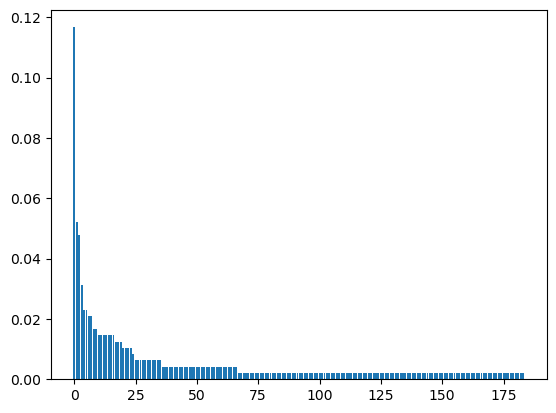

In [19]:
import matplotlib.pyplot as plt

freqs = [bigram[1] for bigram in start_bigrams]
plt.bar(range(len(freqs)), freqs)
plt.show()


### The Temperature
We reweight the distribution over the next word with a temperature following Chollet (2021), _Deep Learning with Python_, 2nd ed., pp. 369 and 373.

Chollet defines the temperature as
$$
    \exp(\frac{\log(x)}{temp}) = x^{\frac{1}{temp}}
$$

In [20]:
def reweight_distribution(original_distribution, T=0.5):
    distribution = np.power(original_distribution, 1/T)
    return distribution / np.sum(distribution)

In [21]:
# Chollet original
"""def reweight_distribution(original_distribution, temperature=0.5):
    distribution = np.log(original_distribution) / temperature
    distribution = np.exp(distribution)
    return distribution / np.sum(distribution)"""


'def reweight_distribution(original_distribution, temperature=0.5):\n    distribution = np.log(original_distribution) / temperature\n    distribution = np.exp(distribution)\n    return distribution / np.sum(distribution)'

In [22]:
freqs


[0.11666666666666667,
 0.052083333333333336,
 0.04791666666666667,
 0.03125,
 0.022916666666666665,
 0.022916666666666665,
 0.020833333333333332,
 0.020833333333333332,
 0.016666666666666666,
 0.016666666666666666,
 0.014583333333333334,
 0.014583333333333334,
 0.014583333333333334,
 0.014583333333333334,
 0.014583333333333334,
 0.014583333333333334,
 0.014583333333333334,
 0.0125,
 0.0125,
 0.0125,
 0.010416666666666666,
 0.010416666666666666,
 0.010416666666666666,
 0.010416666666666666,
 0.008333333333333333,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.004166666666666667,
 0.0

Low temperatures: more deterministic. We freeze the generation

In [23]:
low_temp_freqs = reweight_distribution(freqs, T=0.5)
low_temp_freqs


array([5.23364486e-01, 1.04305741e-01, 8.82843792e-02, 3.75500668e-02,
       2.01935915e-02, 2.01935915e-02, 1.66889186e-02, 1.66889186e-02,
       1.06809079e-02, 1.06809079e-02, 8.17757009e-03, 8.17757009e-03,
       8.17757009e-03, 8.17757009e-03, 8.17757009e-03, 8.17757009e-03,
       8.17757009e-03, 6.00801068e-03, 6.00801068e-03, 6.00801068e-03,
       4.17222964e-03, 4.17222964e-03, 4.17222964e-03, 4.17222964e-03,
       2.67022697e-03, 1.50200267e-03, 1.50200267e-03, 1.50200267e-03,
       1.50200267e-03, 1.50200267e-03, 1.50200267e-03, 1.50200267e-03,
       1.50200267e-03, 1.50200267e-03, 1.50200267e-03, 1.50200267e-03,
       6.67556742e-04, 6.67556742e-04, 6.67556742e-04, 6.67556742e-04,
       6.67556742e-04, 6.67556742e-04, 6.67556742e-04, 6.67556742e-04,
       6.67556742e-04, 6.67556742e-04, 6.67556742e-04, 6.67556742e-04,
       6.67556742e-04, 6.67556742e-04, 6.67556742e-04, 6.67556742e-04,
       6.67556742e-04, 6.67556742e-04, 6.67556742e-04, 6.67556742e-04,
      

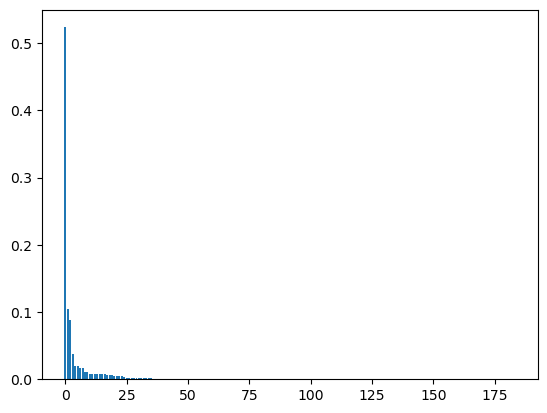

In [24]:
plt.bar(range(len(low_temp_freqs)), low_temp_freqs)
plt.show()


High temperatures: More randomness

In [25]:
high_temp_freqs = reweight_distribution(freqs, T=3.0)


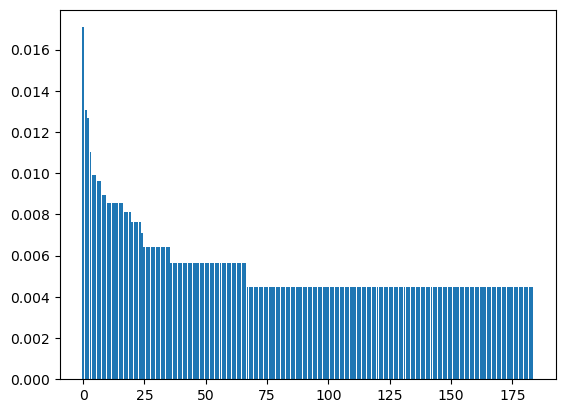

In [26]:
plt.bar(range(len(high_temp_freqs)), high_temp_freqs)
plt.show()


In [27]:
temperature = 3.0


In [28]:
print(start_word, end=' ')
next_word = start_word
for i in range(50):
    cprob = cond_prob(next_word)
    distribution = [i[1] for i in cprob]
    distribution = reweight_distribution(distribution, temperature)
    bigram = cprob[np.argmax(np.random.multinomial(1, distribution))]
    print(bigram[0][1], end=' ')
    next_word = bigram[0][1]


hector spoke thus commands me go till they run rolling swiftly o muses dwellers on the carnage and now eleven cubits long setting foot she are driving the oak that somewhere among one therefore if we both those high into some braggart and hate even of omens when tlepolemus son taking 